In [1]:
#Importing the necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42)

In [2]:
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# 1. Loading the Dataset and Basic Stats

In [3]:
df_main = pd.read_csv('csm148finalprojectdata.csv')

In [4]:
df_main.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df_main.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
#basic stats
df_main.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [7]:
df_main.shape

(5110, 12)

Text(0.5, 1, 'Correlation between different features')

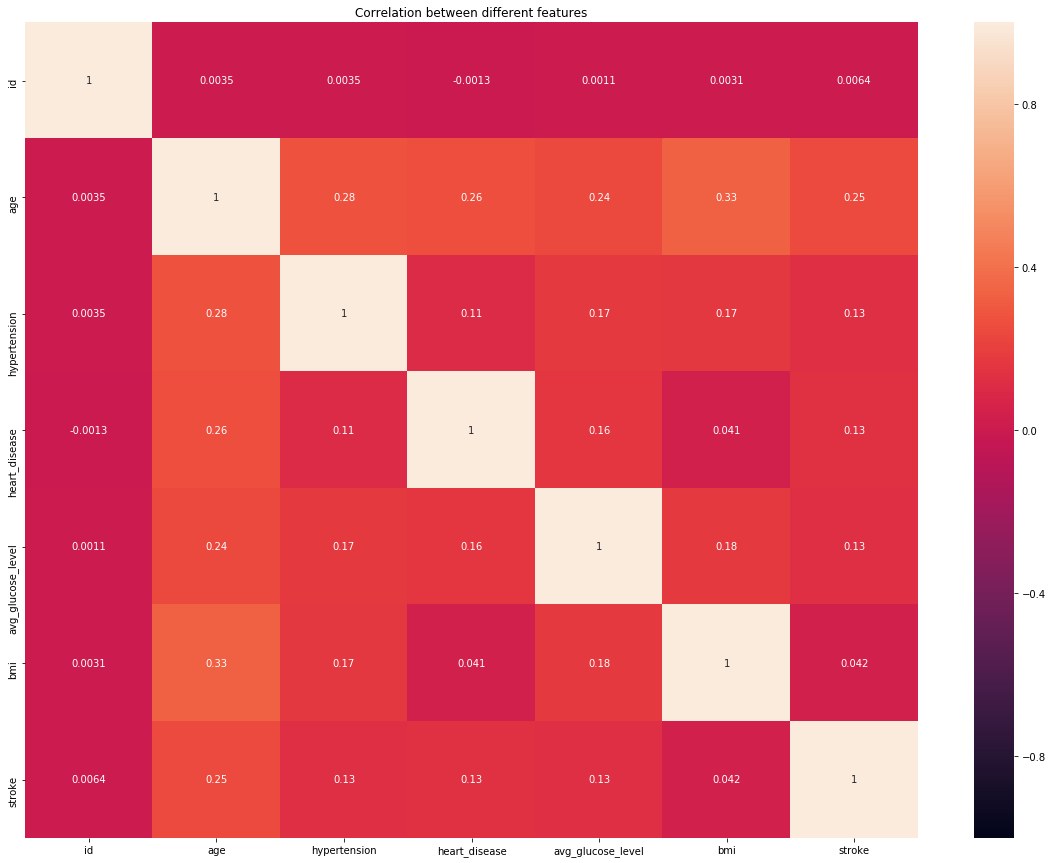

In [8]:
#Correlation between different labels
plt.figure(figsize=(20, 15))
hmap = sns.heatmap(df_main.corr(), vmin=-1, vmax=1, annot=True)
hmap.set_title('Correlation between different features')

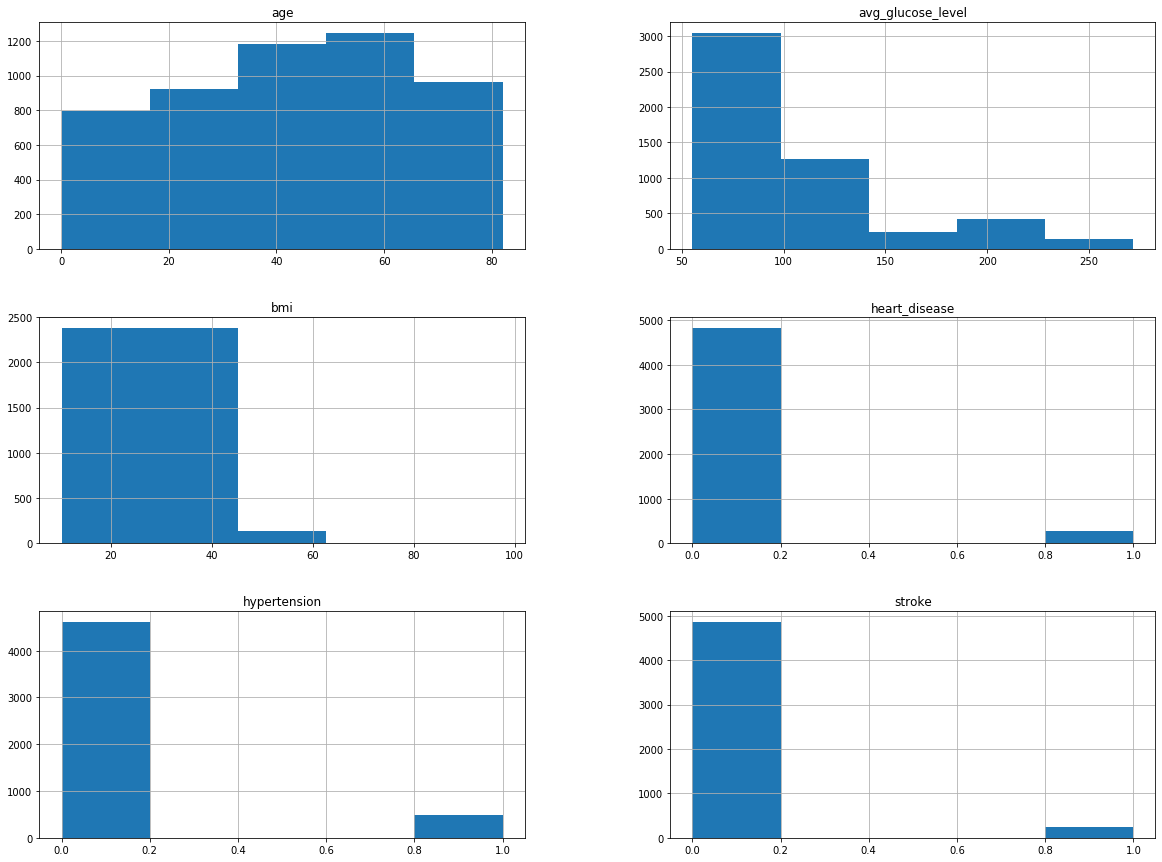

In [9]:
df_main = df_main.drop("id", axis=1)
df_main.hist(bins=5, figsize=(20,15))
plt.show()

# 2. Pipeline and Data Augmentation

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [11]:
df1 = df_main.copy()

In [12]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Determining categorization strategy
### OHE - one hot encoding
### LE - label encoding

In [13]:
df1['work_type'].unique() #OHE

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [14]:
df1['Residence_type'].unique() #LE

array(['Urban', 'Rural'], dtype=object)

In [15]:
df1['smoking_status'].unique() #OHE

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
df1['ever_married'].unique() #LE

array(['Yes', 'No'], dtype=object)

In [17]:
df1['gender'].unique() #OHE

array(['Male', 'Female', 'Other'], dtype=object)

## Adding a new feature

In [18]:
#This was done initially to determine what feature to augment and commented out on rerunning
#it is done from scratch in the pipeline
#df1['bmi_x_age'] = df1["bmi"]*df1["age"]

In [19]:
#corr_matrix = df1.corr()
#corr_matrix["stroke"].sort_values(ascending=False)

In [20]:
#df1.describe()

# Building the Pipeline

In [21]:
df1_features = df1.drop("stroke", axis=1)
df1_labels = df1["stroke"].copy()

In [22]:
#Label encoding binary features prior to pipeline transformation
le = LabelEncoder()
for col in ["Residence_type","ever_married"]:
    df1_features[col] = le.fit_transform(df1_features[col])

In [23]:
df1_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int64
work_type            5110 non-null object
Residence_type       5110 non-null int64
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 399.3+ KB


In [24]:
df1_features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
1,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked


In [25]:
# This cell implements the complete pipeline for preparing the data
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="mean") # use mean imputation for missing values
# remove the categorical features
df1_num = df1_features.drop(["gender", "ever_married", "heart_disease", "hypertension", "work_type", "Residence_type", "smoking_status"], axis=1)

age_idx, bmi_idx = 0 , 2

class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    df1['bmi_x_age'] = df1["bmi"]*df1["age"]
    '''
    def __init__(self, add_bmi_x_age = True): 
        self.add_bmi_x_age = add_bmi_x_age
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        final = X
        if self.add_bmi_x_age:
            bmi_x_age = X[:, bmi_idx] * X[:, age_idx]
            final = np.c_[X, bmi_x_age]
        return final

attr_adder = AugmentFeatures()
df1_extra_attribs = attr_adder.transform(df1.values) # generate new features

# this will be are numirical pipeline
# 1. impute, 2. augment the feature set 3. normalize using StandardScaler()
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

df1_num_tr = num_pipeline.fit_transform(df1_num)

numerical_features = list(df1_num)
categorical_features = ["gender", "work_type", "smoking_status"]

full_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features)],
    remainder='passthrough')

data_prepared = full_pipeline.fit_transform(df1_features)

In [26]:
data_prepared

array([[ 1.05143428e+00,  2.70637544e+00,  1.00123401e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 7.86070073e-01,  2.12155854e+00,  4.61555355e-16, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.62639008e+00, -5.02830130e-03,  4.68577254e-01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-3.63841511e-01, -5.11442636e-01,  2.21736316e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.43796387e-01,  1.32825706e+00, -4.27845098e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.42048064e-02, -4.60867458e-01, -3.49895329e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

## Splitting the Dataset

In [27]:
Xp_train, Xp_test, Yp_train, Yp_test = train_test_split(data_prepared, df1_labels, test_size=0.2, random_state=42)
print("Xp_train shape:", Xp_train.shape)
print("Yp_train shape:", Yp_train.shape)
print("Xp_test shape:", Xp_test.shape)
print("Yp_test shape:", Yp_test.shape)

Xp_train shape: (4088, 20)
Yp_train shape: (4088,)
Xp_test shape: (1022, 20)
Yp_test shape: (1022,)


In [28]:
Yp_train.value_counts()

0    3901
1     187
Name: stroke, dtype: int64

## Balancing the dataset

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm = SMOTE(random_state=20)
Xp_train, Yp_train = sm.fit_resample(Xp_train, Yp_train)

In [31]:
Yp_train.value_counts()

1    3901
0    3901
Name: stroke, dtype: int64

# 3. Logistic Regression

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### solver='lbfgs'

In [33]:
log_clf = LogisticRegression(solver='lbfgs').fit(Xp_train, Yp_train)
y_pred = log_clf.predict(Xp_test)

In [34]:
acc_log = accuracy_score(Yp_test, y_pred)
prec_log = precision_score(Yp_test, y_pred)
rec_log = recall_score(Yp_test, y_pred)
f1_log = f1_score(Yp_test, y_pred)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)

Accuracy: 0.7524461839530333
Precision: 0.1695501730103806
Recall: 0.7903225806451613
F1 Score: 0.2792022792022792


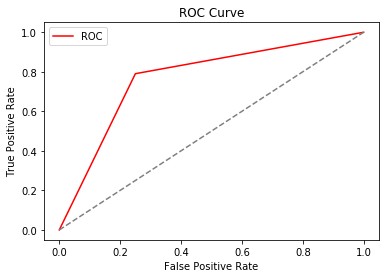

AUC: 0.7701612903225806


In [35]:
fpr, tpr, threshold = metrics.roc_curve(Yp_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### solver='sag'

In [36]:
log_clf2 = LogisticRegression(penalty='none', solver='sag', max_iter=100).fit(Xp_train, Yp_train)
y_pred1 = log_clf2.predict(Xp_test)

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [37]:
acc_log = accuracy_score(Yp_test, y_pred1)
prec_log = precision_score(Yp_test, y_pred1)
rec_log = recall_score(Yp_test, y_pred1)
f1_log = f1_score(Yp_test, y_pred1)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)

Accuracy: 0.7534246575342466
Precision: 0.1701388888888889
Recall: 0.7903225806451613
F1 Score: 0.27999999999999997


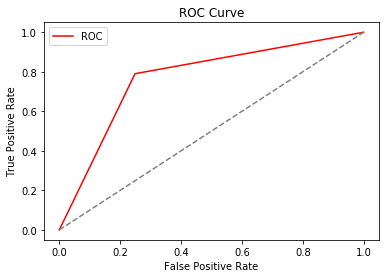

AUC: 0.7706821236559139


In [38]:
fpr, tpr, threshold = metrics.roc_curve(Yp_test, y_pred1)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Associated p-values and regression

In [39]:
import statsmodels.api as sms

In [40]:
# build the OLS model (ordinary least squares) from the training data
stroke_stats = sms.OLS(df1_labels, data_prepared)

# do the fit and save regression info (parameters, etc) in results_stats
results_stats = stroke_stats.fit()

In [41]:
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     27.73
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           3.07e-85
Time:                        12:34:47   Log-Likelihood:                 822.99
No. Observations:                5110   AIC:                            -1610.
Df Residuals:                    5092   BIC:                            -1492.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0857      0.015      5.696      0.0

# 4. PCA

In [42]:
from sklearn import decomposition

In [43]:
pca_data = data_prepared.copy()

In [44]:
pca_data

array([[ 1.05143428e+00,  2.70637544e+00,  1.00123401e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 7.86070073e-01,  2.12155854e+00,  4.61555355e-16, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.62639008e+00, -5.02830130e-03,  4.68577254e-01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-3.63841511e-01, -5.11442636e-01,  2.21736316e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.43796387e-01,  1.32825706e+00, -4.27845098e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.42048064e-02, -4.60867458e-01, -3.49895329e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [45]:
pca = decomposition.PCA(0.8)

# Now we run the fit operation to convert our 
# data to a PCA transformmed data
pca_data = pca.fit_transform(pca_data)

In [46]:
pca_data.shape

(5110, 6)

## Splitting the data

In [47]:
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(pca_data, df1_labels, test_size=0.2, random_state=42)

## Balancing the Data

In [48]:
sm = SMOTE(random_state=20)
new_X_train, new_Y_train = sm.fit_resample(new_X_train, new_Y_train)

In [49]:
new_Y_train.value_counts()

1    3901
0    3901
Name: stroke, dtype: int64

## Implementing Logistic Regression after PCA transformation

## solver='lbgfs'

In [50]:
log_clf = LogisticRegression(solver='lbfgs').fit(new_X_train, new_Y_train)
y_pred = log_clf.predict(new_X_test)

In [51]:
acc_log = accuracy_score(new_Y_test, y_pred)
prec_log = precision_score(new_Y_test, y_pred)
rec_log = recall_score(new_Y_test, y_pred)
f1_log = f1_score(new_Y_test, y_pred)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)

Accuracy: 0.7397260273972602
Precision: 0.17096774193548386
Recall: 0.8548387096774194
F1 Score: 0.2849462365591398


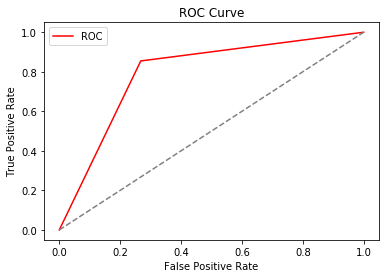

AUC: 0.793565188172043


In [52]:
fpr, tpr, threshold = metrics.roc_curve(Yp_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

## solver='sag'

In [ ]:
log_clf2 = LogisticRegression(penalty='none', solver='sag', max_iter=100).fit(new_X_train, new_Y_train)
y_pred1 = log_clf2.predict(new_X_test)

In [54]:
acc_log = accuracy_score(new_Y_test, y_pred1)
prec_log = precision_score(new_Y_test, y_pred1)
rec_log = recall_score(new_Y_test, y_pred1)
f1_log = f1_score(new_Y_test, y_pred1)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)

Accuracy: 0.7397260273972602
Precision: 0.17096774193548386
Recall: 0.8548387096774194
F1 Score: 0.2849462365591398


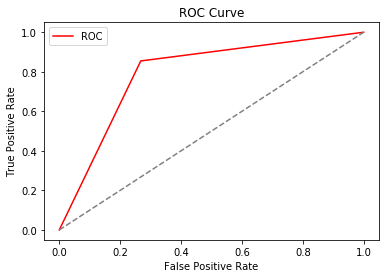

AUC: 0.793565188172043


In [55]:
fpr, tpr, threshold = metrics.roc_curve(Yp_test, y_pred1)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

# 5. Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [57]:
tree = DecisionTreeClassifier(max_depth=3, random_state=20)

## Using non-PCA data

In [58]:
bagging = BaggingClassifier(base_estimator=tree, n_estimators=16, max_samples=200, bootstrap=True)

In [59]:
bagging.fit(Xp_train, Yp_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=20),
                  max_samples=200, n_estimators=16)

In [60]:
y_pred = bagging.predict(Xp_test)

In [61]:
acc_bag = accuracy_score(Yp_test, y_pred)
prec_bag = precision_score(Yp_test, y_pred)
rec_bag = recall_score(Yp_test, y_pred)
f1_bag = f1_score(Yp_test, y_pred)

print("Accuracy:", acc_bag)
print("Precision:", prec_bag)
print("Recall:", rec_bag)
print("F1 Score:", f1_bag)

Accuracy: 0.7397260273972602
Precision: 0.16883116883116883
Recall: 0.8387096774193549
F1 Score: 0.28108108108108104


## Using PCA data

In [62]:
bagging2 = BaggingClassifier(base_estimator=tree, n_estimators=6, max_samples=200, bootstrap=True)

In [63]:
bagging2.fit(new_X_train, new_Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=20),
                  max_samples=200, n_estimators=6)

In [64]:
y_pred = bagging2.predict(new_X_test)

In [65]:
acc_bag = accuracy_score(new_Y_test, y_pred)
prec_bag = precision_score(new_Y_test, y_pred)
rec_bag = recall_score(new_Y_test, y_pred)
f1_bag = f1_score(new_Y_test, y_pred)

print("Accuracy:", acc_bag)
print("Precision:", prec_bag)
print("Recall:", rec_bag)
print("F1 Score:", f1_bag)

Accuracy: 0.700587084148728
Precision: 0.1534090909090909
Recall: 0.8709677419354839
F1 Score: 0.2608695652173913


## Hyperparameter tuning (using only PCA transformed data)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

In [78]:
f1 = make_scorer(f1_score , average='macro')

In [79]:
n_estimators = [10, 50, 100]
max_samples = [0.6, 0.8, 1.0]
max_features = [4, 5, 6]

In [80]:
grid = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)
grid_search = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier()), param_grid=grid, n_jobs=-1, cv=5, scoring=f1)

In [81]:
grid_result = grid_search.fit(new_X_train, new_Y_train)

In [82]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.936358 using {'max_features': 4, 'max_samples': 1.0, 'n_estimators': 100}


# 6. Neural Network

Note: From this point on, only PCA tranformed data is used.

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [73]:
#We only use PCA transformed data from this point on
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21)
mlp_clf.fit(new_X_train, new_Y_train)

y_pred = mlp_clf.predict(new_X_test)

Iteration 1, loss = 0.51515358
Iteration 2, loss = 0.43941632
Iteration 3, loss = 0.42570626
Iteration 4, loss = 0.43331772
Iteration 5, loss = 0.40764382
Iteration 6, loss = 0.39441906
Iteration 7, loss = 0.38384440
Iteration 8, loss = 0.37244122
Iteration 9, loss = 0.36142105
Iteration 10, loss = 0.35324388
Iteration 11, loss = 0.33810572
Iteration 12, loss = 0.33745566
Iteration 13, loss = 0.31911395
Iteration 14, loss = 0.31699107
Iteration 15, loss = 0.32137112
Iteration 16, loss = 0.32485903
Iteration 17, loss = 0.31909150
Iteration 18, loss = 0.31202846
Iteration 19, loss = 0.28559606
Iteration 20, loss = 0.36002740
Iteration 21, loss = 0.31929477
Iteration 22, loss = 0.28196541
Iteration 23, loss = 0.26923592
Iteration 24, loss = 0.26142548
Iteration 25, loss = 0.28480182
Iteration 26, loss = 0.26371197
Iteration 27, loss = 0.27743039
Iteration 28, loss = 0.25938998
Iteration 29, loss = 0.24255022
Iteration 30, loss = 0.23457857
Iteration 31, loss = 0.23201297
Iteration 32, los

In [74]:
acc_nn = accuracy_score(new_Y_test, y_pred)
prec_nn = precision_score(new_Y_test, y_pred)
rec_nn = recall_score(new_Y_test, y_pred)
f1_nn = f1_score(new_Y_test, y_pred)

print("Accuracy:", acc_nn)
print("Precision:", prec_nn)
print("Recall:", rec_nn)
print("F1 Score:", f1_nn)

Accuracy: 0.8424657534246576
Precision: 0.14388489208633093
Recall: 0.3225806451612903
F1 Score: 0.19900497512437812


## Hyperparameter tuning

In [84]:
nn_clf = MLPClassifier(max_iter=200)

parameter_space = {
    'hidden_layer_sizes': [(50,100,150), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
}

grid_clf = GridSearchCV(nn_clf, parameter_space, n_jobs=-1, cv=3, scoring=f1)

In [85]:
grid_result = grid_clf.fit(new_X_train, new_Y_train)

In [86]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.924051 using {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 150), 'learning_rate': 'adaptive', 'solver': 'adam'}


# 7. K-Fold Cross Validation

In [94]:
from sklearn.model_selection import KFold
from sklearn import model_selection

## Stratified K Fold

In [100]:
kfold = model_selection.StratifiedKFold(n_splits=5)

In [102]:
bag_model_kfold = BaggingClassifier(base_estimator=tree, n_estimators=6, max_samples=200, bootstrap=True)

nn_model_kfold = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200, alpha=0.001,
                     solver='adam')

bag_results_kfold = model_selection.cross_val_score(bag_model_kfold, pca_data, df1_labels, cv=kfold, scoring=f1)

nn_results_kfold = model_selection.cross_val_score(nn_model_kfold, pca_data, df1_labels, cv=kfold, scoring=f1)


# Because we're collecting results from all runs, we take the mean value
print(" Bagging f1 score: %.2f%%" % (bag_results_kfold.mean()*100.0)) 

print("Neural Network f1 score: %.2f%%" % (nn_results_kfold.mean()*100.0))

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 Bagging f1 score: 50.55%
Neural Network f1 score: 53.51%


/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## StratifiedShuffleSplit

In [103]:
kfold = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=20)

In [104]:
bag_model_kfold = BaggingClassifier(base_estimator=tree, n_estimators=6, max_samples=200, bootstrap=True)

nn_model_kfold = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200, alpha=0.001,
                     solver='adam')

bag_results_kfold = model_selection.cross_val_score(bag_model_kfold, pca_data, df1_labels, cv=kfold, scoring=f1)

nn_results_kfold = model_selection.cross_val_score(nn_model_kfold, pca_data, df1_labels, cv=kfold, scoring=f1)


# Because we're collecting results from all runs, we take the mean value
print(" Bagging f1 score: %.2f%%" % (bag_results_kfold.mean()*100.0)) 

print("Neural Network f1 score: %.2f%%" % (nn_results_kfold.mean()*100.0))

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 Bagging f1 score: 49.84%
Neural Network f1 score: 52.10%


/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 8. Custom Models

## SVM 

In [107]:
clf_svm = SVC(probability=True, gamma='scale')
clf_svm.fit(new_X_train, new_Y_train)

SVC(probability=True)

In [109]:
y_svm_pred = clf_svm.predict(new_X_test)

In [113]:
acc_svm = accuracy_score(new_Y_test, y_svm_pred)
prec_svm = precision_score(new_Y_test, y_svm_pred)
rec_svm = recall_score(new_Y_test, y_svm_pred)
f1_svm = f1_score(new_Y_test, y_svm_pred)

print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.735812133072407
Precision: 0.15100671140939598
Recall: 0.7258064516129032
F1 Score: 0.25


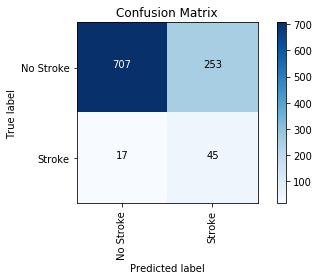

In [114]:
draw_confusion_matrix(new_Y_test, y_svm_pred, ['No Stroke', 'Stroke'])

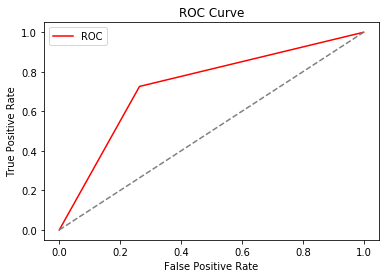

AUC: 0.7311323924731183


In [115]:
fpr, tpr, threshold = metrics.roc_curve(new_Y_test, y_svm_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

## Bayesian Classification

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
clf_bayes = GaussianNB().fit(new_X_train, new_Y_train)

In [118]:
preds = clf_bayes.predict(new_X_test)

In [119]:
acc_bayes = accuracy_score(new_Y_test, preds)
prec_bayes = precision_score(new_Y_test, preds)
rec_bayes = recall_score(new_Y_test, preds)
f1_bayes = f1_score(new_Y_test, preds)

print("Accuracy:", acc_bayes)
print("Precision:", prec_bayes)
print("Recall:", rec_bayes)
print("F1 Score:", f1_bayes)

Accuracy: 0.6976516634050881
Precision: 0.15406162464985995
Recall: 0.8870967741935484
F1 Score: 0.26252983293556087


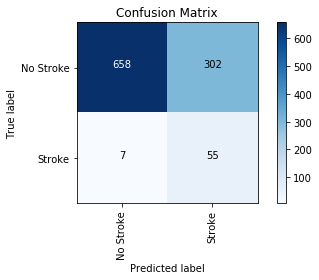

In [120]:
draw_confusion_matrix(new_Y_test, preds, ['No Stroke', 'Stroke'])